### Master of Applied Artificial Intelligence

**Course: TC4031 - Cloud Computing**

<img src="./../../../assets/logo.png" alt="Image Alt Text" width="500"/>

**Face Recognition**

Tutor: Dr. Eduardo Antonio Cendejas


Team members:
* Alejandro Calderon Aguilar - A01795353

In [44]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import cv2
from dotenv import load_dotenv
import os

# Load .env file
load_dotenv()

True

In [ ]:
def face_detection(image_url):
    subscription_key = os.getenv("MY_AZURE_APIKEY")
    
    face_api_url = os.getenv("ENDPOINT") + "/face/v1.0/detect"
    headers = {
        "Ocp-Apim-Subscription-Key": subscription_key
    }

    params = {
        "returnFaceId": "false",
        "returnFaceLandmarks": "false"
    }

    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faceRectangles = json.dumps(response.json())
    print(faceRectangles)
    return faceRectangles


def get_image(image_url):
    response = requests.get(image_url)
    try:
        image_array = np.asarray(bytearray(response.content))
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        bgr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return bgr_image
    except Exception as e:
        print(e)
        return None
    
    
    
def plot_face_rectangles(image, faces):
    
    image = image.copy()
    
    for face in faces:
        rectangle = face["faceRectangle"]
        # comput bottom-right corner
        left = rectangle["left"]
        top = rectangle["top"]
        right = int(rectangle["width"]) + int(rectangle["left"])
        bottom = int(rectangle["height"]) + int(rectangle["top"])
        
        # draw the rectangle on the image
        cv2.rectangle(image, (left,top), (right,bottom), (255, 0,0), 2)
        
    return image
    
    
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray", hideAxis=True):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            if hideAxis:
                ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()

    


In [58]:
# image_url = "https://github.com/ecendejas/imgMNA/blob/main/faces.jpg?raw=true"
image1_url = "https://raw.githubusercontent.com/alcalderagl/cloud_computing/refs/heads/main/assets/personas.jpg"
image2_url = "https://cms-resources.prod.the-internal.cloud/sites/default/files/styles/featured_image/public/2023-08/Bring%20your%20learners%20to%20life%20through%20personas%20%20.jpg?itok=tNZqZkwN"
face_detection1 = face_detection(image1_url)
face_detection2 = face_detection(image2_url)

[{"faceRectangle": {"top": 67, "left": 264, "width": 127, "height": 127}}, {"faceRectangle": {"top": 106, "left": 492, "width": 98, "height": 98}}, {"faceRectangle": {"top": 116, "left": 152, "width": 86, "height": 86}}, {"faceRectangle": {"top": 144, "left": 41, "width": 61, "height": 61}}]
[{"faceRectangle": {"top": 228, "left": 253, "width": 39, "height": 39}}, {"faceRectangle": {"top": 214, "left": 634, "width": 38, "height": 38}}, {"faceRectangle": {"top": 214, "left": 802, "width": 37, "height": 37}}, {"faceRectangle": {"top": 215, "left": 458, "width": 37, "height": 37}}]


In [59]:
image1 = get_image(image1_url)
image2 = get_image(image2_url)
faceRectangles_array1 = json.loads(face_detection1)
faceRectangles_array2 = json.loads(face_detection2)
final_image1 = plot_face_rectangles(image1, faceRectangles_array1)
final_image2 = plot_face_rectangles(image2, faceRectangles_array2)

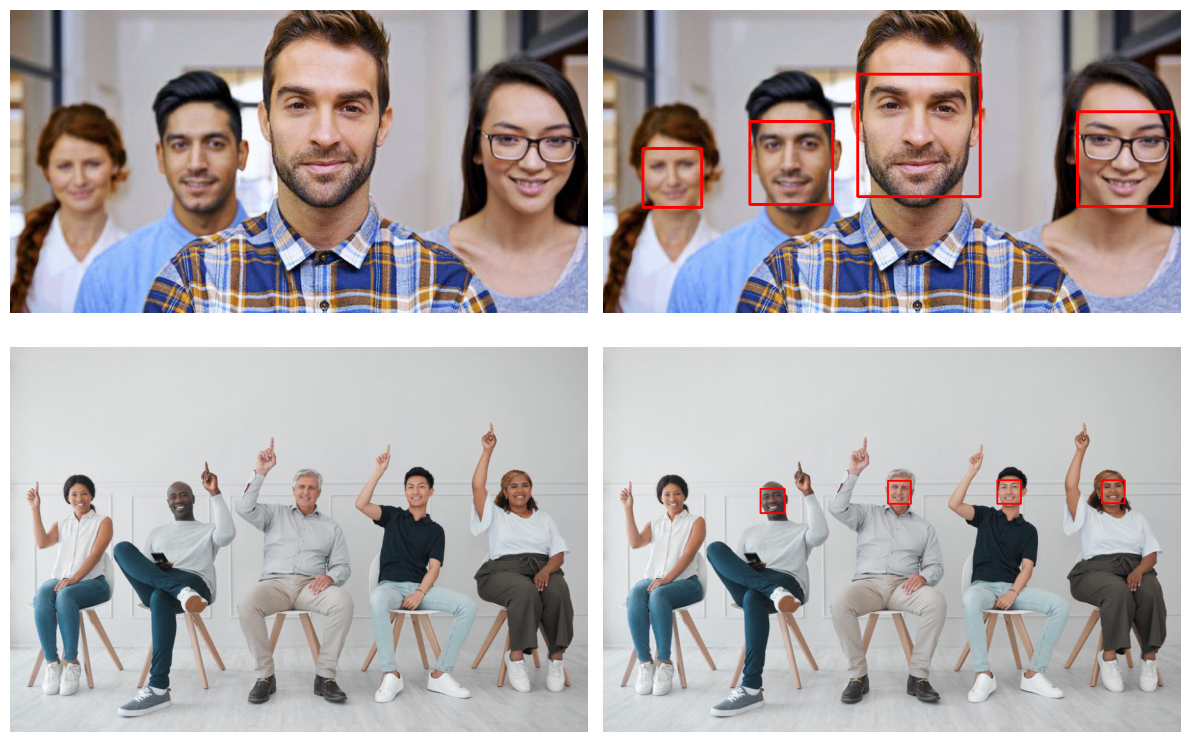

In [60]:
plot_images([image1, final_image1, image2, final_image2], nrows=2, cmap=None)